MACHINE LEARNING

LAB ASSESSMENT - 4

SAM ABRAHAM JOSHY

20BCE0986

LAB L43+L44

1. Implement Hierarchical clustering.

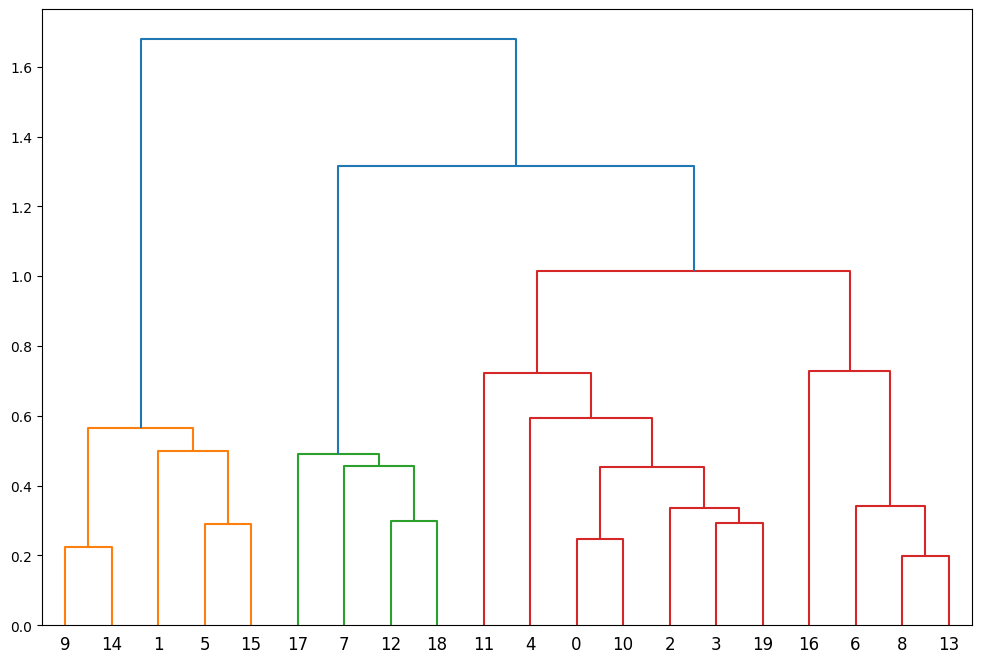

In [7]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Create a sample array
np.random.seed(123)
X = np.random.rand(20, 4)
Z = linkage(X, 'ward')

# Plot
fig = plt.figure(figsize=(12, 8))
dn = dendrogram(Z)

plt.show()


2.Implement Gaussian Mixture Model Using the Expectation Maximization.

3. Evaluating ML algorithm with balanced and unbalanced datasets.

In [8]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Generate a balanced dataset
X_bal, y_bal = make_classification(n_samples=1000,
                                    n_features=10, weights=[0.5, 0.5], random_state=123)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal,
                                                                     y_bal, test_size=0.2, random_state=123)
model_bal = LogisticRegression(random_state=123)
model_bal.fit(X_train_bal, y_train_bal)
y_pred_bal = model_bal.predict(X_test_bal)
print("Balanced Dataset:")
print("Accuracy:", accuracy_score(y_test_bal, y_pred_bal))
print("Classification Report:\n", classification_report(y_test_bal, y_pred_bal))

# Generate an unbalanced dataset
X_unbal, y_unbal = make_classification(n_samples=1000, n_features=10, weights=[0.9, 0.1], random_state=123)
X_train_unbal, X_test_unbal, y_train_unbal, y_test_unbal = train_test_split(X_unbal, y_unbal, test_size=0.2, random_state=123)
model_unbal = LogisticRegression(random_state=123)
model_unbal.fit(X_train_unbal, y_train_unbal)
y_pred_unbal = model_unbal.predict(X_test_unbal)
print("Unbalanced Dataset:")
print("Accuracy:", accuracy_score(y_test_unbal, y_pred_unbal))
print("Classification Report:\n", classification_report(y_test_unbal, y_pred_unbal))


Balanced Dataset:
Accuracy: 0.955
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        99
           1       0.97      0.94      0.95       101

    accuracy                           0.95       200
   macro avg       0.96      0.96      0.95       200
weighted avg       0.96      0.95      0.95       200

Unbalanced Dataset:
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       177
           1       0.84      0.70      0.76        23

    accuracy                           0.95       200
   macro avg       0.90      0.84      0.87       200
weighted avg       0.95      0.95      0.95       200



4. Implement K‐means Clustering.

Cluster centers:

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



[[0.68057184 0.71758764]
 [0.66020666 0.20992015]
 [0.23104274 0.57255892]]
Labels:
[1 2 1 0 1 2 1 2 2 0 0 0 1 1 2 2 2 1 0 0 1 2 1 0 0 2 0 2 2 0 0 0 1 1 2 2 0
 2 1 2 2 1 0 1 2 0 2 0 2 2 0 2 2 0 1 2 2 2 0 2 1 2 0 2 1 1 0 1 1 2 2 0 0 1
 0 2 2 1 0 1 0 1 0 2 0 1 0 1 2 2 1 2 0 2 0 2 2 2 2 1]


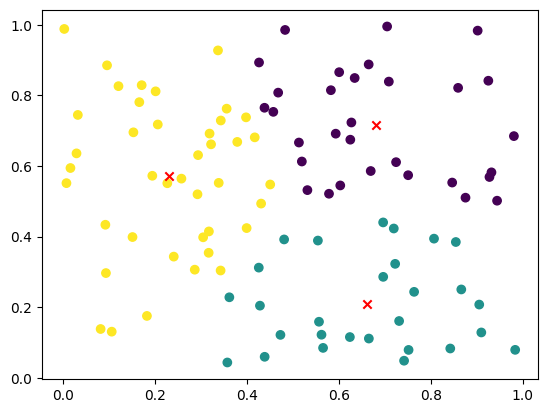

In [9]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate some random data
np.random.seed(123)
X = np.random.rand(100, 2)

# K-means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(X)

print("Cluster centers:")
print(kmeans.cluster_centers_)
print("Labels:")
print(kmeans.labels_)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red')
plt.show()



5. Implement K-mode clustering.

6.Compare the performance of following machine learning algorithms for the 'National Institute of Diabetes and Digestive and Kidney Diseases" Dataset available in the kaggle database.
a)K-Nearest Neigbour Classifier b)Decision Tree Classifier c)Support Vector Machine

7.Implement the Principle Component Analysis for Dimensionality Reduction
